In [212]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as font_manager

In [213]:
# 한글 폰트 찾기
import matplotlib.font_manager as font_manager

# 특정 위치에 있는 모든 폰트 찾기
font_dir = ['/Users/kimminsoo/Library/Fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)

# font.family 설정
mpl.rcParams['font.family'] = 'NanumGothicOTF'
print(mpl.rcParams['font.family'])

?????
MesloLGS NF
MesloLGS NF
MesloLGS NF
NanumGothicOTF
NanumGothic
Kyobo Handwriting 2021
MesloLGS NF
['NanumGothicOTF']


# 5. 검색엔진(네이버 데이터랩) 기반으로 각 직무별 검색량
        1) 네이버 데이터랩 검색어트렌트를 활용하여 검색량을 자료로 만들기
        2) row : 연도별 합계, columns : 직무별 합계만 가지는 DataFrame 만들기
        3) 평균치 계산 후, csv 파일 저장
        4) 직무별 검색량 - 연도별 pie chart
        5) wordcloud 활용


### 1) 네이버 데이터 검색어 트렌트를 활용하여 검색량을 자료로 만들기

In [214]:
# xlsx 에서 csv 파일로 변환 후, 데이터프레임 생성
xlsx = pd.read_excel('../data/datalab.xlsx')
data_report = xlsx.to_csv('../data/datalab.csv')
data_lab = pd.read_csv('../data/datalab.csv', index_col=0).reset_index(drop=True)
data_lab

,날짜,데이터 개발자,데이터 개발자.1,데이터 개발자.2,데이터 개발자.3,데이터 개발자.4,데이터 개발자 합계,데이터 과학자,데이터 과학자.1,데이터 과학자.2,...,데이터 컨설턴트.2,데이터 컨설턴트.3,데이터 컨설턴트.4,데이터 컨설턴트 합계,데이터베이스관리자,데이터베이스관리자.1,데이터베이스관리자.2,데이터베이스관리자.3,데이터베이스관리자.4,데이터베이스관리자 합계
0,2018-01-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,32.04283,32.04283,32.04283,...,0.00000,0.00000,0.00000,0.00000,17.87479,17.87479,17.87479,17.87479,50.58275,122.08191
1,2018-02-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,29.44810,29.44810,29.44810,...,0.00000,0.00000,0.00000,0.00000,14.29159,14.29159,14.29159,14.29159,40.44289,97.60925
2,2018-03-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,39.42888,39.42888,39.42888,...,0.00000,0.00000,0.00000,0.00000,32.12520,32.12520,32.12520,32.12520,90.90909,219.40989
3,2018-04-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,32.77045,32.77045,32.77045,...,0.00000,0.00000,0.00000,0.00000,25.16474,25.16474,25.16474,25.16474,71.21212,171.87108
4,2018-05-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,35.33772,35.33772,35.33772,...,0.00000,0.00000,0.00000,0.00000,25.65897,25.65897,25.65897,25.65897,72.61072,175.24660
5,2018-06-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,34.52773,34.52773,34.52773,...,0.00000,0.00000,0.00000,0.00000,22.03459,22.03459,22.03459,22.03459,62.35431,150.49267
6,2018-07-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,100.00000,100.00000,100.00000,...,0.00000,0.00000,0.00000,0.00000,21.85612,21.85612,21.85612,21.85612,61.84926,149.27374
7,2018-08-01,0.08237,0.08237,0.50505,0.23310,0.23310,1.13599,40.04667,40.04667,40.04667,...,0.06864,0.06864,0.42087,0.69543,21.14222,21.14222,21.14222,21.14222,59.82905,144.39793
8,2018-09-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,32.75672,32.75672,32.75672,...,0.00000,0.00000,0.00000,0.00000,23.42119,23.42119,23.42119,23.42119,66.27816,159.96292
9,2018-10-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,38.05601,38.05601,38.05601,...,0.16474,0.16474,1.01010,1.66906,31.58978,31.58978,31.58978,31.58978,89.39393,215.75305


### 2) row : 연도별 합계, columns : 직무별 합계만 가지는 DataFrame 만들기

In [215]:
# row : 연도별 합계 
data_lab = data_lab[data_lab["날짜"].str.endswith("합계")]
data_lab

,날짜,데이터 개발자,데이터 개발자.1,데이터 개발자.2,데이터 개발자.3,데이터 개발자.4,데이터 개발자 합계,데이터 과학자,데이터 과학자.1,데이터 과학자.2,...,데이터 컨설턴트.2,데이터 컨설턴트.3,데이터 컨설턴트.4,데이터 컨설턴트 합계,데이터베이스관리자,데이터베이스관리자.1,데이터베이스관리자.2,데이터베이스관리자.3,데이터베이스관리자.4,데이터베이스관리자 합계
12,2018년 합계,0.15101,0.15101,0.92592,0.42735,0.42735,2.08264,520.01642,520.01642,520.01642,...,0.31575,0.31575,1.93602,3.19902,278.10262,278.10262,278.10262,278.10262,786.98519,1899.39567
25,2019년 합계,0.43930,0.43930,2.69360,1.24320,1.24320,6.05860,612.13615,612.13615,612.13615,...,0.00000,0.00000,0.00000,0.00000,205.23058,205.23058,205.23058,205.23058,580.76917,1401.69149
38,2020년 합계,2.11420,2.11420,12.96294,5.98290,5.98290,29.15714,605.86210,605.86210,605.86210,...,0.00000,0.00000,0.00000,0.00000,167.97083,167.97083,167.97083,167.97083,475.33017,1147.21349
51,2021년 합계,2.75944,2.75944,16.91917,7.80885,7.80885,38.05575,598.47605,598.47605,598.47605,...,0.28829,0.28829,1.76766,2.92082,97.00708,97.00708,97.00708,97.00708,274.51431,662.54263


In [216]:
# columns: 직무별 합계
data_lab = data_lab.filter(like="합계", axis=1)

# index, columns명 수정
data_lab.columns = ["데이터개발자", "데이터과학자", "데이터기획자", "데이터분석가", "데이터아키텍트", "데이터엔지니어", "데이터컨설턴트", "데이터베이스관리자"]
data_lab.index = ["2018", "2019", "2020", "2021"]
data_lab

,데이터개발자,데이터과학자,데이터기획자,데이터분석가,데이터아키텍트,데이터엔지니어,데이터컨설턴트,데이터베이스관리자
2018,2.08264,2600.08210,1.64209,1420.69028,1.32532,156.19914,3.19902,1899.39567
2019,6.05860,3060.68075,0.82104,1436.62094,0.94665,465.94725,0.00000,1401.69149
2020,29.15714,3029.31050,2.79155,2598.37739,9.84520,1221.19496,0.00000,1147.21349
2021,38.05575,2992.38025,2.13473,2827.82778,16.09317,2160.66333,2.92082,662.54263


### 3) 평균치 계산 후, csv 파일 저장

In [217]:
# 평균치 계산(행:12, 열:5)
data_lab_avg = round(data_lab.div(60),2)

# csv 파일 저장
data_lab_avg.to_csv('../data/datalab_search_volumn(ver2.0).csv', sep=',')

In [218]:
data_lab_avg

,데이터개발자,데이터과학자,데이터기획자,데이터분석가,데이터아키텍트,데이터엔지니어,데이터컨설턴트,데이터베이스관리자
2018,0.03,43.33,0.03,23.68,0.02,2.60,0.05,31.66
2019,0.10,51.01,0.01,23.94,0.02,7.77,0.00,23.36
2020,0.49,50.49,0.05,43.31,0.16,20.35,0.00,19.12
2021,0.63,49.87,0.04,47.13,0.27,36.01,0.05,11.04


### 4) 직무별 검색량 - 연도별 pie chart

#### 4-1) 2018년도 직무별 검색량 - pie chart

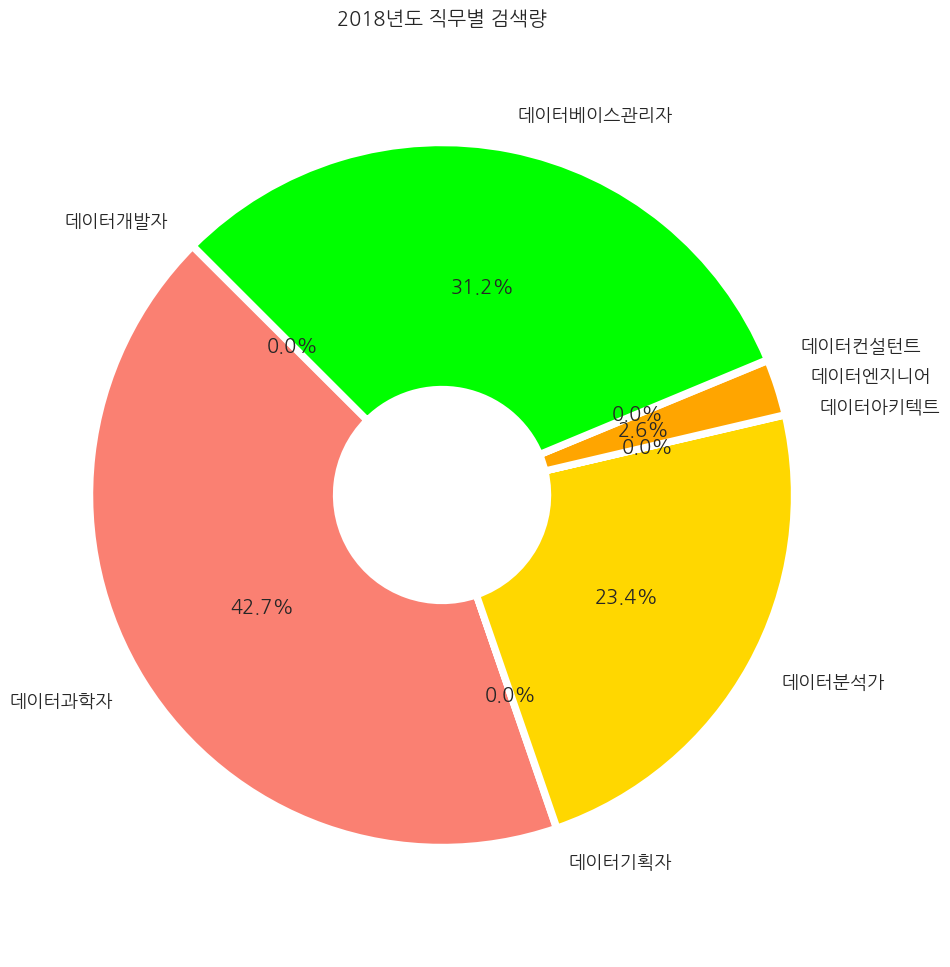

In [219]:
colors = ['lightgray', 'salmon', 'skyblue', 'gold', 'whitesmoke'
          , 'orange', 'silver', 'lime']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(10,12))
plt.title('2018년도 직무별 검색량')
plt.pie(data_lab_avg.values[0], labels=data_lab_avg.columns, colors=colors,
        autopct='%1.1f%%', startangle=135, wedgeprops=wedgeprops)
plt.axis('equal')
plt.show()

#### 4-2) 2019년도 직무별 검색량 - pie chart

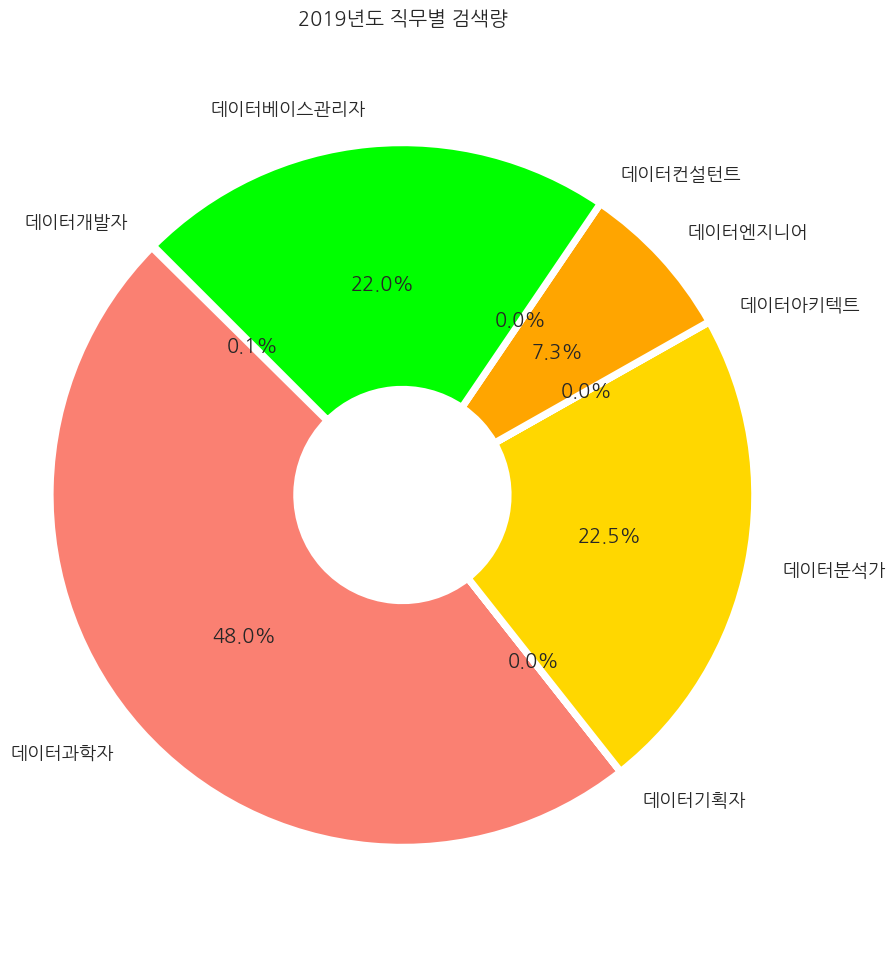

In [220]:
colors = ['lightgray', 'salmon', 'skyblue', 'gold', 'whitesmoke', 'orange', 'silver', 'lime']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(10,12))
plt.title('2019년도 직무별 검색량')
plt.pie(data_lab_avg.values[1], labels=data_lab_avg.columns, colors=colors,
        autopct='%1.1f%%', startangle=135, wedgeprops=wedgeprops)
plt.axis('equal')
plt.show()

#### 4-3) 2020년도 직무별 검색량 - pie chart

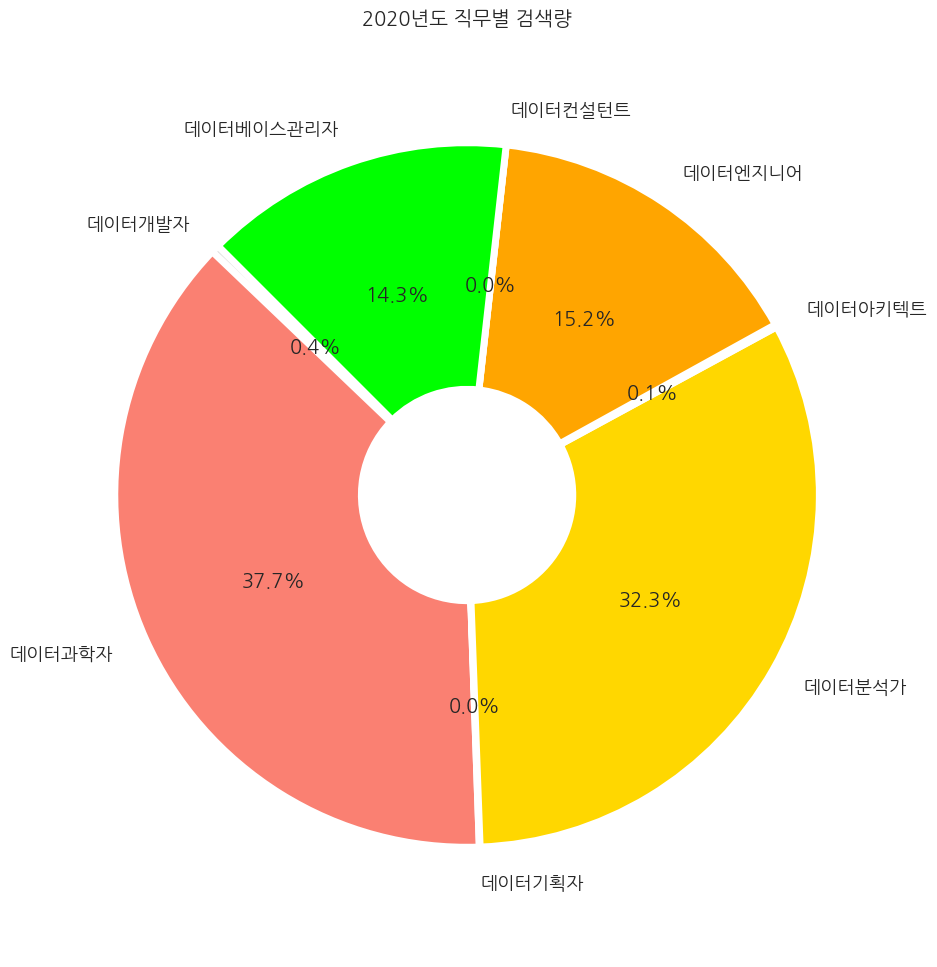

In [221]:
colors = ['lightgray', 'salmon', 'skyblue', 'gold', 'whitesmoke', 'orange', 'silver', 'lime']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(10,12))
plt.title('2020년도 직무별 검색량')
plt.pie(data_lab_avg.values[2], labels=data_lab_avg.columns, colors=colors,
        autopct='%1.1f%%', startangle=135, wedgeprops=wedgeprops)
plt.axis('equal')
plt.show()

#### 4-4) 2021년도 직무별 검색량 - pie chart

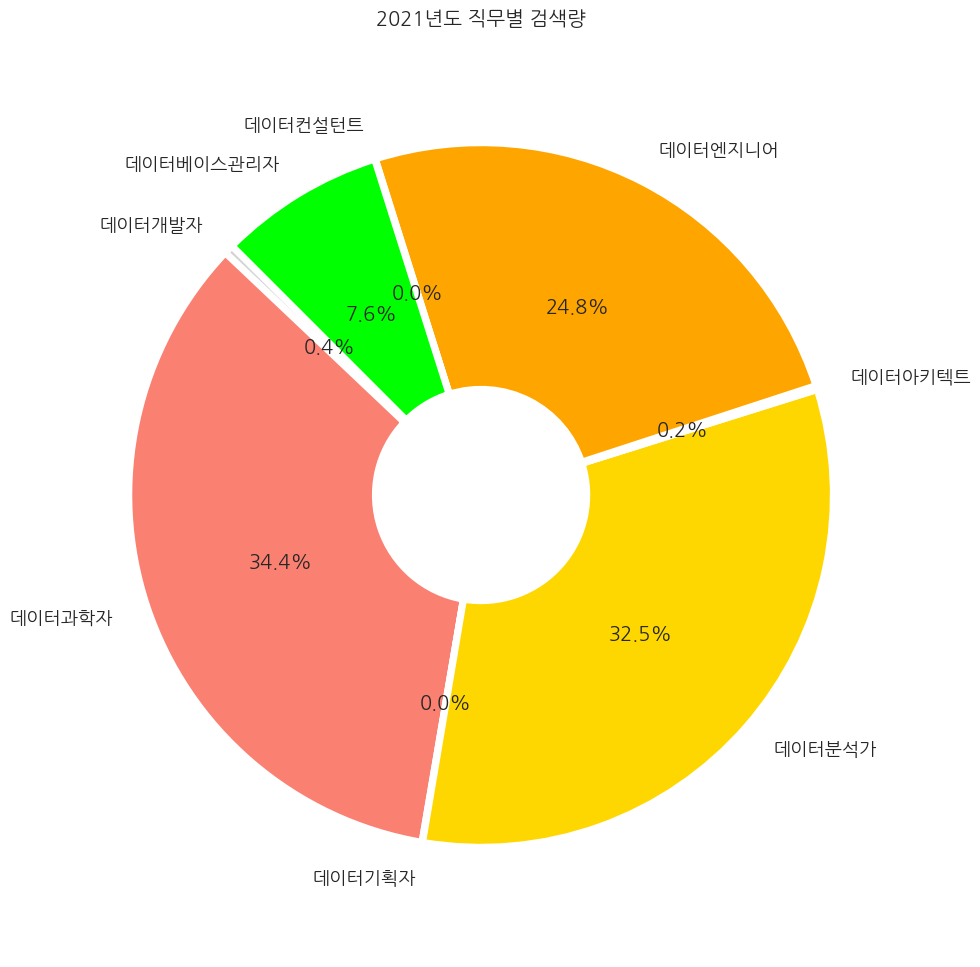

In [222]:
colors = ['lightgray', 'salmon', 'skyblue', 'gold', 'whitesmoke', 'orange', 'silver', 'lime']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(10,12))
plt.title('2021년도 직무별 검색량')
plt.pie(data_lab_avg.values[3], labels=data_lab_avg.columns, colors=colors,
        autopct='%1.1f%%', startangle=135, wedgeprops=wedgeprops)
plt.axis('equal')
plt.show()

### 5) wordcloud 활용

In [138]:
# nltk 라이브러리 설치
#!pip install nltk konlpy Wordcloud

In [226]:
# 라이브러리 설치 및 임포트
import nltk
import math
from konlpy.corpus import kobill
from wordcloud import WordCloud

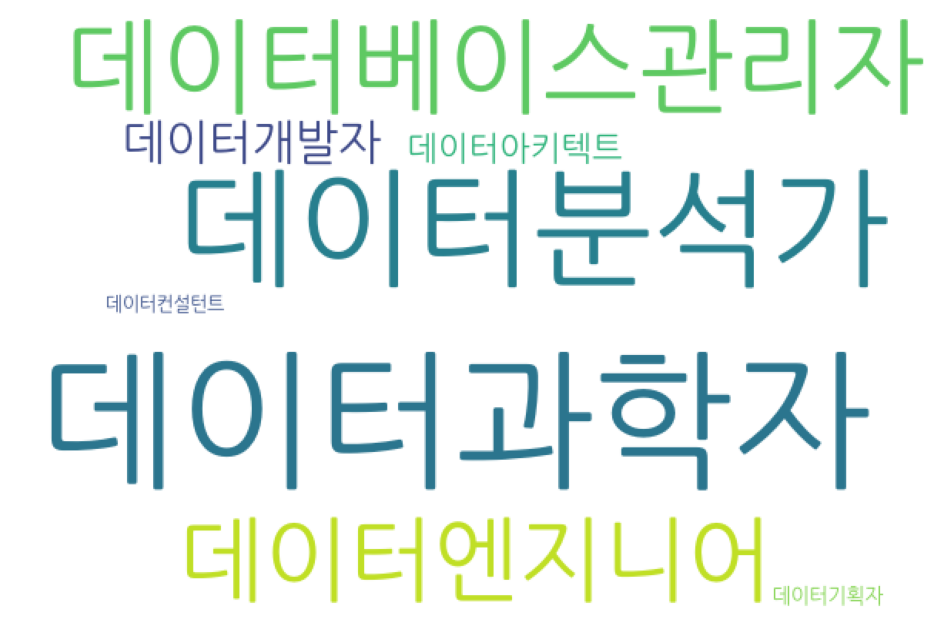

In [227]:
# 직무별 합계
data_lab_total = pd.DataFrame(data_lab.sum(axis=0)).transpose()

# 데이터프레임 값을 int으로 타입 변환
data_lab_total = data_lab_total.astype(int)

# 데이터프레임 column 내에 띄어쓰기 삭제
data_lab_total.columns = ["데이터개발자 ", "데이터과학자 ", 
                          "데이터기획자 ", "데이터분석가 ", 
                          "데이터아키텍트 ", "데이터엔지니어 ", 
                          "데이터컨설턴트 ", "데이터베이스관리자 "]

# 데이터프레임의 인덱스에 해당하는 단어들을 가져오기
data_words = data_lab_total.columns

# 각 단어들을 원하는 횟수만큼 반복하여 문자열로 저장
data_word = "".join([str(data_words[i] * data_lab_total.values[0,i])
                      for i in range(len(data_words))
                      ])

# WordCloud 객체를 생성하고, 생성한 문자열을 사용하여 wordcloud를 생성
wordcloud = WordCloud(collocation_threshold=int(1e6),
                       font_path="/Users/kimminsoo/Library/Fonts/NanumGothic.otf",
                       width=600, height=400,
                       background_color="white").generate(data_word)

# wordcloud를 시각화
plt.figure(figsize=(12, 8))
plt.axis("off")
plt.grid(False)
plt.imshow(wordcloud)
plt.show()